# Data analysis example

This notebook describes an example of how to use the badge_data_analysis package to obtain the metrics of the meeting. It is strongly based on [this notebook](https://github.com/HumanDynamics/openbadge-analysis-examples/blob/master/notebooks/multi-channel_VAD_illustration.ipynb).

In [1]:
from badge_data_analysis import preprocessing
from badge_data_analysis import vad
from badge_data_analysis import metrics
from badge_data_analysis import plot

%matplotlib notebook

# Change matplotlib defaults
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

First, the data file is readed, the data is processed and the audio signal from each participant is plotted.

<IPython.core.display.Javascript object>


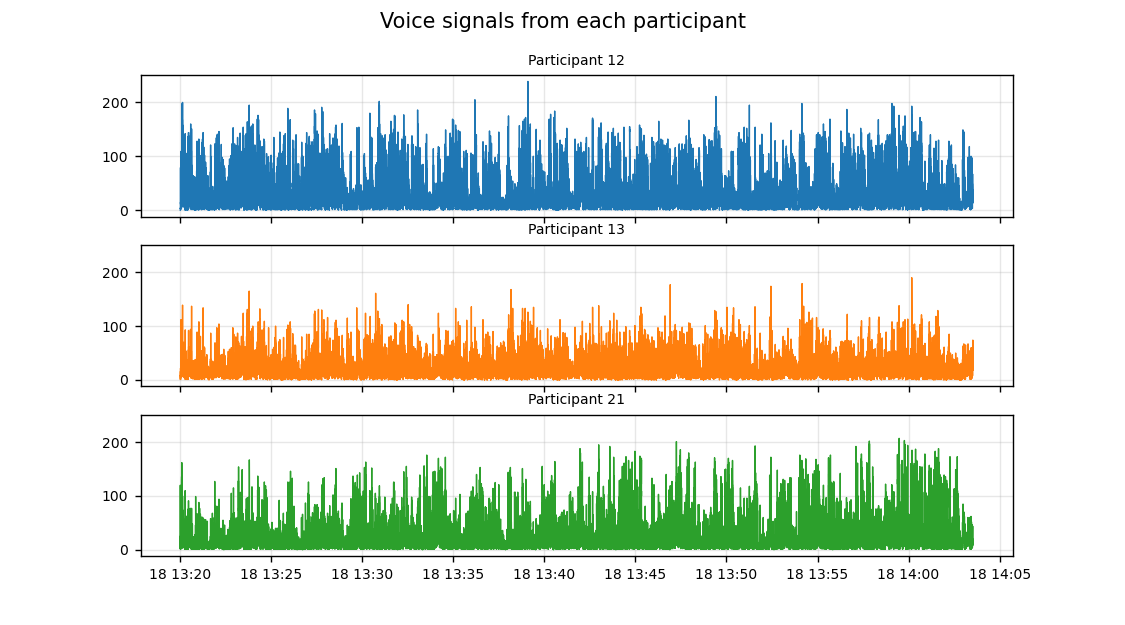

In [2]:
filename = 'data/audio_data_session_1.txt'

data = preprocessing.read_file(filename, excluded_members=[22])
data = preprocessing.fix_time_jumps(data)
data = preprocessing.truncate(data)
data = preprocessing.remove_offset(data)

fig, axes = plot.signals(data)

<IPython.core.display.Javascript object>


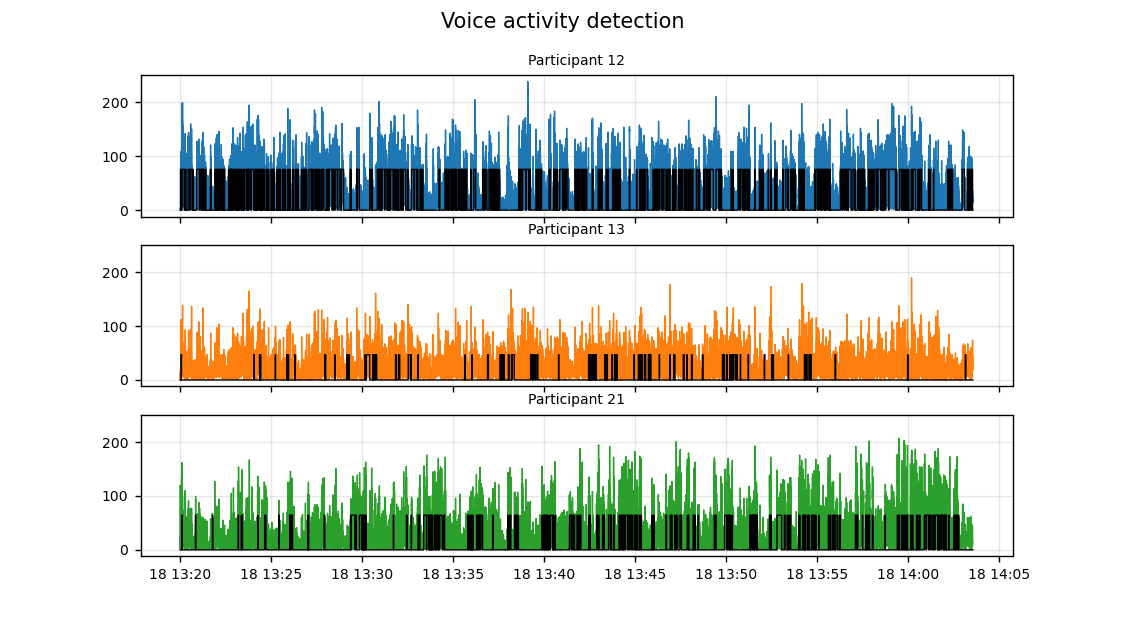

In [3]:
data = vad.genuine_speak(data)

fig, axes = plot.vad(data, all_speak=False, real_speak=False)

Member 12 mean thr: 31.8
Member 12 std  thr: 16.8
Member 13 mean thr: 25.2
Member 13 std  thr: 13.6
Member 21 mean thr: 33.9
Member 21 std  thr: 19.9


<IPython.core.display.Javascript object>


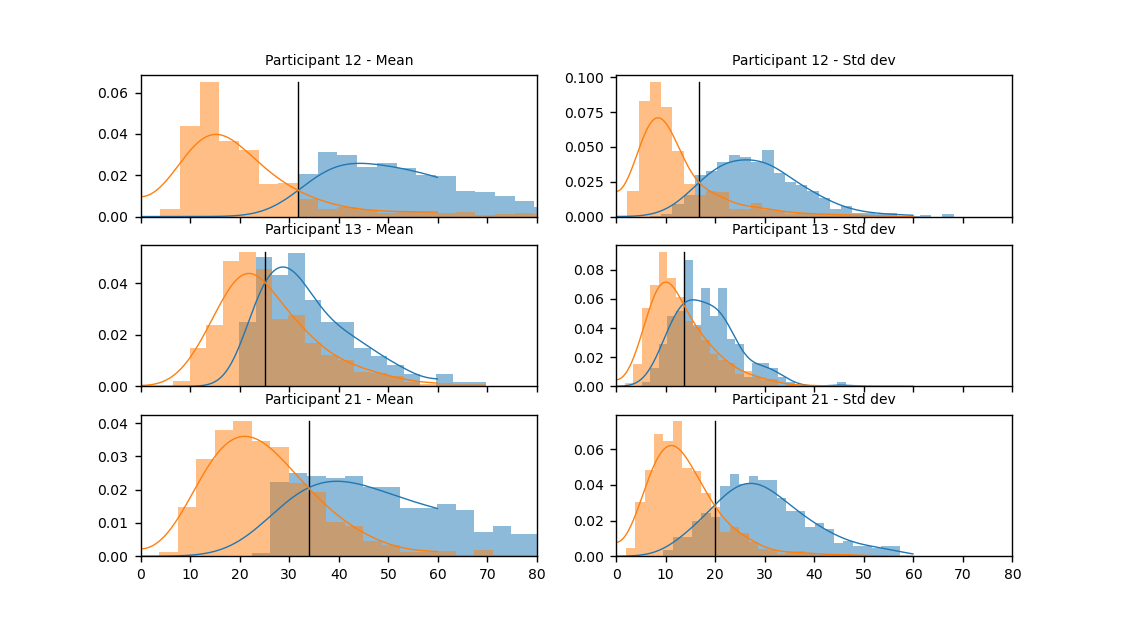

In [4]:
data = vad.calculate_thresholds(data, bandwidth=0.4)

fig, axes = plot.histograms(data, bandwidth=0.4)

<IPython.core.display.Javascript object>


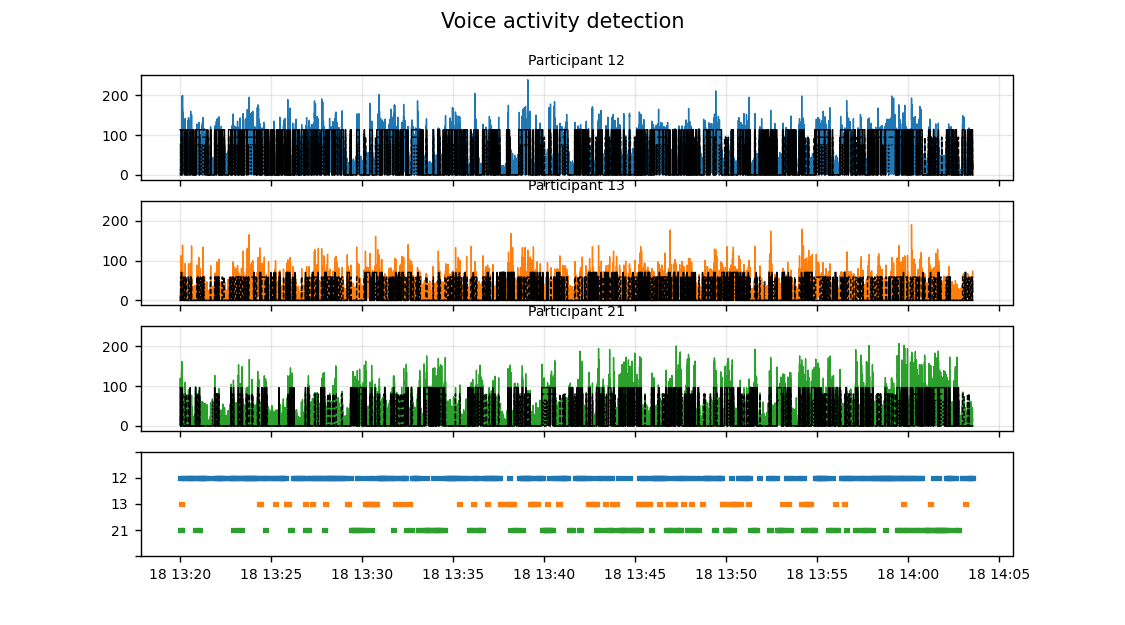

In [5]:
data = vad.all_speak(data)
data = vad.real_speak(data)

fig, axes = plot.vad(data)

Team vocalization distribution:
    Coefficient of variation:   0.57
    Dominance:                  2.85
    Total team participation:   84.29%
    Clean participation:        73.25%
Turn taking:
    Team turn taking frequency: 4.76 Turns/min
    Avgerage speech segment:    10.63 sec
Overlapping speech:
    Total overlap time:         11.03%
    Avgerage overlap duration:  1.24 sec


<IPython.core.display.Javascript object>


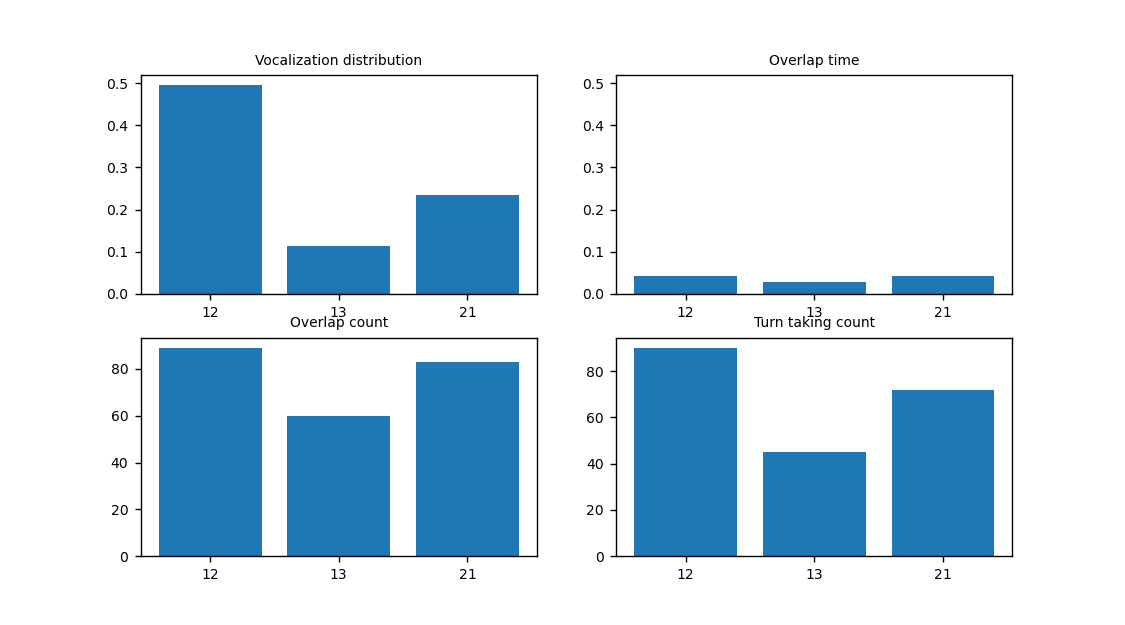

In [8]:
data = metrics.speaking_time(data)
data = metrics.overlap_time(data)
data = metrics.overlap_count(data)
data = metrics.turn_taking(data, min_succesive_non_overlap=2)
metrics.calculate_indicators(data)

fig, axes = plot.metrics(data)